# Corpus EDA

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

from myFunctions import process_tweet_text_encode_to_ascii
from myFunctions import get_social_media_stopwords_list
from myFunctions import plot_word_cloud
from myFunctions import clean_tweet, tokenize_tweet, tokenize_lemmatize_tweet

In [3]:
# read in the processed data
pos_tweets = pd.read_csv('../data/cleaned_tweets_positive.csv', encoding = 'unicode_escape')
neg_tweets = pd.read_csv('../data/cleaned_tweets_negative.csv', encoding = 'unicode_escape')
neutral_tweets = pd.read_csv('../data/cleaned_tweets_neutral.csv', encoding = 'unicode_escape')
all_tweets = pd.read_csv('../data/cleaned_tweets_all.csv')

## Most Common Words
What are the most common words found in Positive, Negative and Neutral Tweets?

In [4]:
# Create word clouds of the most common words in Positive, Negative (and Neutral) Tweets
# Note: no lemma done here
positive_tweet_words = list()
for tweet in pos_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        positive_tweet_words.append(word)

negative_tweet_words = list()
for tweet in neg_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        negative_tweet_words.append(word)

neutral_tweet_words = list()
for tweet in neutral_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        neutral_tweet_words.append(word)


In [5]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def plot_wordcloud(text, stopwords_list, bg_color='white', mask=None, max_words=400, max_font_size=120, figure_size=(16.0,10.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(stopwords_list)

    wordcloud = WordCloud(background_color=bg_color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    min_word_length=2,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '../images/'

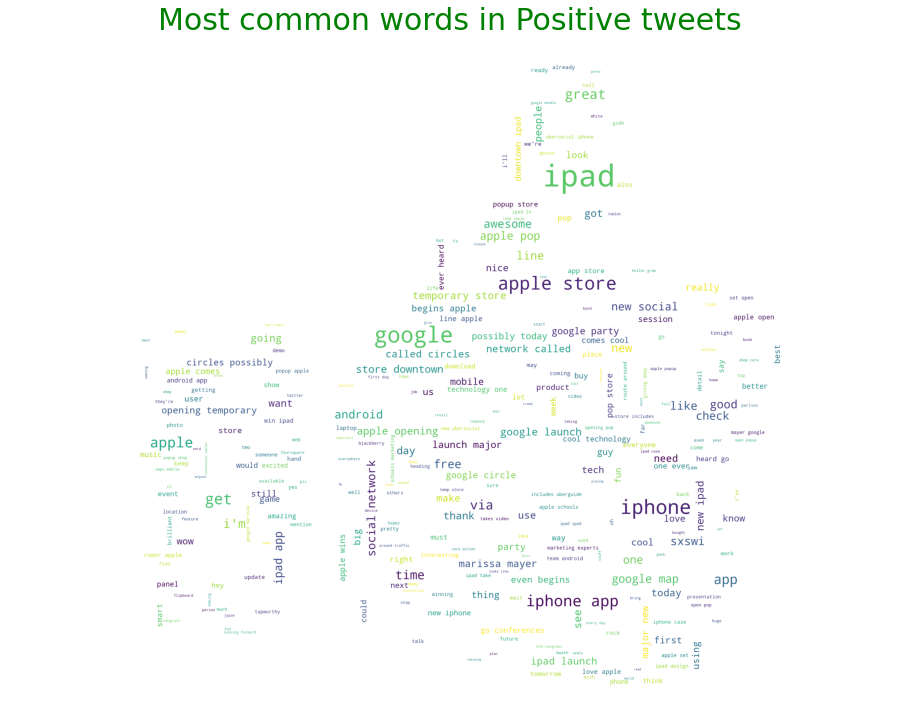

In [6]:
# Postive Tweets top words
pos_text = ' '.join(word for word in positive_tweet_words)
pos_mask = np.array(Image.open(d + 'upvote.png'))
plot_wordcloud(pos_text, get_social_media_stopwords_list(), mask=pos_mask, max_words=300, max_font_size=140, 
               title = 'Most common words in Positive tweets', title_size=30)


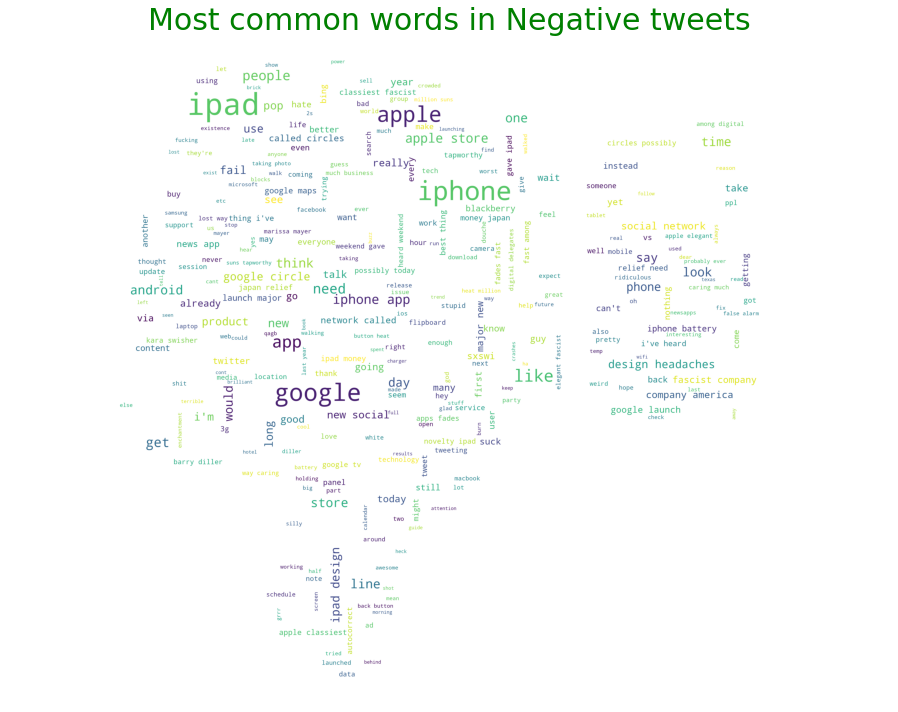

In [7]:
# Negative Tweets top words
neg_text = ' '.join(word for word in negative_tweet_words)
neg_mask = np.array(Image.open(d + 'downvote.png'))
plot_wordcloud(neg_text, get_social_media_stopwords_list(), mask=neg_mask, max_words=300, max_font_size=140, 
               title = 'Most common words in Negative tweets', title_size=30)

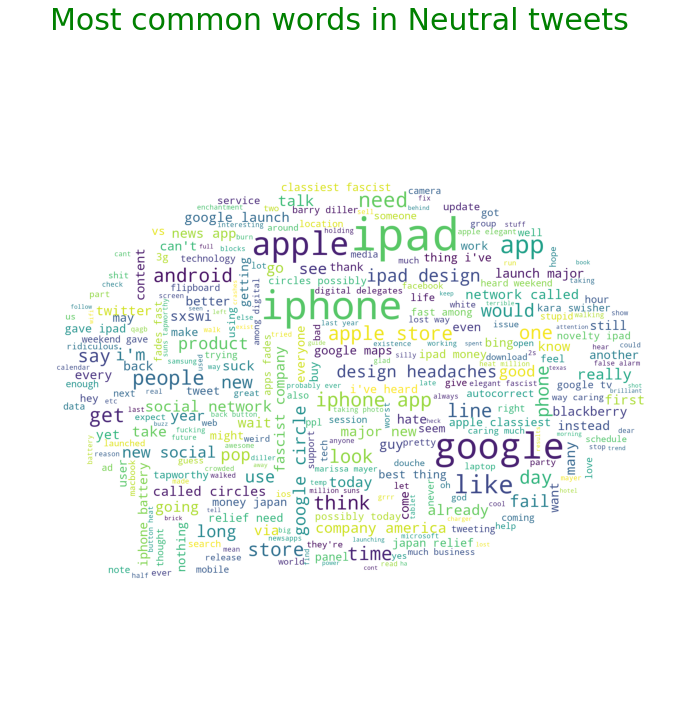

In [8]:
# Neutral Tweets top words
nu_text = ' '.join(word for word in negative_tweet_words)
nu_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(nu_text, get_social_media_stopwords_list(), mask=nu_mask, max_words=300, max_font_size=140, 
               title = 'Most common words in Neutral tweets', title_size=30)

### Insights/Recommendations:
* This is really mainly for fun and to give a quick look at what consumers are saying. Word clouds are not suitable for doing any deep analysis of word frequencies. :)
* One thing to notice, there are words that appear in all three clouds. Consumers are using these words on all Tweets no matter the sentiment.

## Is there a difference in character count between Postitive/Negative/Neutral Tweets?
### Histogram of char count for each sentiment class

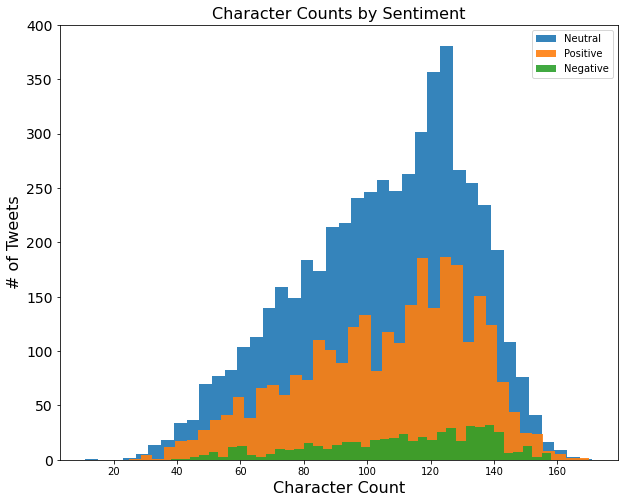

In [35]:
# Show the distribution of tweet character count for each of the sentiment classes
plfig = plt.figure(figsize = (10, 8))
plt.hist(neutral_tweets['tweet_char_count'], bins=40, alpha=0.9)
plt.hist(pos_tweets['tweet_char_count'], bins=40,alpha=0.9)
plt.hist(neg_tweets['tweet_char_count'], bins=40, alpha=0.9)
plt.legend(('Neutral', 'Positive', 'Negative'))
plt.grid=False
plt.xlabel('Character Count', size=16)
plt.ylabel('# of Tweets', size=16)
plt.title('Character Counts by Sentiment', size=16)
plt.yticks(size=14)
plt.show()

### Insights/Recommendations:
* Character Count won't be a good feature for Classification. There is overlap between all three Sentiment classes. 

## Future Work
* Explore if punctuation would be a good feature for text classification.